In [59]:
import tensorflow as tf
import numpy as np
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import torch 
from sklearn.metrics import classification_report
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
   device = torch.device("cpu")


%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense,LSTM,Dropout,BatchNormalization,Bidirectional,Input
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.optimizers import Adam,SGD
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')
LIBRARY_PATH = '/content/drive/MyDrive/NLP PROJECT/'


Tensorflow version 2.8.0
Running on TPU  ['10.8.240.98:8470']
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.8.240.98:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.8.240.98:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
train = pd.read_csv(LIBRARY_PATH + "preprocessed_data/clean_train.csv")
test = pd.read_csv(LIBRARY_PATH + "preprocessed_data/clean_test.csv")

In [ ]:
train['target'].unique()

array([1, 0])

In [62]:
X_train, X_val, y_train, y_val = train_test_split(train['text without sw_freq'].values,train['target'].values, test_size = 0.33,stratify= train['target'].values,random_state=30)

In [63]:
X_test = test['text without sw_freq'].values


In [64]:
max_len = 10
tok = Tokenizer(num_words=max_len)
tok.fit_on_texts(X_train)
train_sequences = tok.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences,maxlen=max_len,padding='post')
val_sequences = tok.texts_to_sequences(X_val)
val_padded = pad_sequences(val_sequences,maxlen= max_len,padding='post')
test_sequences = tok.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences,maxlen=max_len,padding='post')
vocab_size = len(tok.word_index)

## Model configuration  and testing 

In [75]:
def create_lstm():
  model = Sequential()
  model.add(Embedding(input_dim=vocab_size,output_dim=16,input_length=max_len))
  model.add(Bidirectional(LSTM(16,return_sequences=False)))
  model.add(Dense(16,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.summary()
  return model

In [76]:

lr = 1e-3
epochs = 10
lstm_opt = Adam(learning_rate=lr)
# lstm_opt = SGD(learning_rate=lr)
with tpu_strategy.scope():
  lstm = create_lstm()
  lstm.compile(loss=BinaryCrossentropy(),
                optimizer=lstm_opt,
                metrics=['accuracy'])
  lstm_res = lstm.fit(train_padded,
            y_train,
            batch_size=32,
            epochs=epochs,
            validation_data=(val_padded, y_val), verbose=False)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 10, 16)            179824    
                                                                 
 bidirectional_7 (Bidirectio  (None, 32)               4224      
 nal)                                                            
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 184,593
Trainable params: 184,593
Non-trainable params: 0
_________________________________________________________________


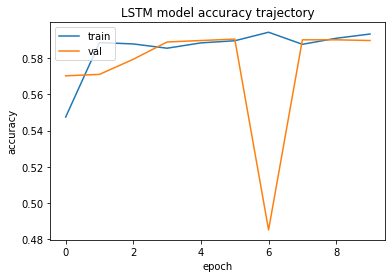

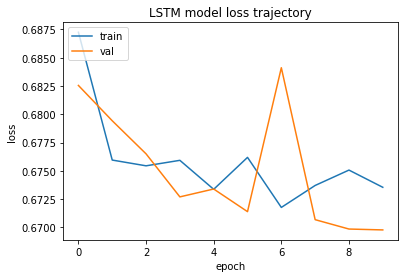

In [74]:
import matplotlib.pyplot as plt

# Plotting accuracy trajectory
plt.plot(lstm_res.history['accuracy'])
plt.plot(lstm_res.history['val_accuracy'])
plt.title('LSTM model accuracy trajectory')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plotting loss trajectory
plt.plot(lstm_res.history['loss'])
plt.plot(lstm_res.history['val_loss'])
plt.title('LSTM model loss trajectory')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [72]:
train_score = lstm.evaluate(train_padded, y_train, verbose=0)
valid_score = lstm.evaluate(val_padded,y_val,verbose=0)
print(' lstm train accuracy: ',train_score[1])
print(' lstm valid accuracy:',valid_score[1])

 lstm train accuracy:  0.5996078252792358
 lstm valid accuracy: 0.5901313424110413


In [88]:
y_probs = lstm.predict(val_padded, batch_size=32, verbose=0)
y_probs.reshape((y_probs.shape[0],))
y_pred = [1 if x >= 0.5 else 0 for x in y_probs ]
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.94      0.73      1433
           1       0.63      0.14      0.22      1080

    accuracy                           0.59      2513
   macro avg       0.61      0.54      0.47      2513
weighted avg       0.61      0.59      0.51      2513



## Model Configuration 2  , Word2vec + LSTM 

In [90]:
import gensim
from nltk import TweetTokenizer
tokenizer = TweetTokenizer()
train['tokenized_text'] = train['text without sw_freq'].apply(lambda x : tokenizer.tokenize(x))
# pretrained_w2v =  gensim.downloader.load('word2vec-google-news-300')
w2v = gensim.models.Word2Vec(train['tokenized_text'].values, size=300, min_count=1, 
                                    window=5, iter=300)




In [91]:
pretrained_weights = w2v.wv.vectors
vocab_size, emdedding_size = pretrained_weights.shape
print('Result embedding shape:', pretrained_weights.shape)

Result embedding shape: (14163, 300)


In [92]:
X_train, X_val, y_train, y_val = train_test_split(train['tokenized_text'].values,train['target'].values, test_size = 0.33,stratify= train['target'].values,random_state=30)

In [93]:
max_len =20
tok = Tokenizer()
tok.fit_on_texts(X_train)
train_sequences = tok.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences,maxlen=max_len,padding='post')
val_sequences = tok.texts_to_sequences(X_val)
val_padded = pad_sequences(val_sequences,maxlen= max_len,padding='post')

In [94]:
from tensorflow.keras.layers import SpatialDropout1D

def create_w2v_lstm():
  model = Sequential()
  vocab_size,embedding_size = pretrained_weights.shape
  model.add(Embedding(input_dim=vocab_size,input_length=max_len, output_dim=embedding_size,weights =[pretrained_weights],trainable=False))
  model.add(SpatialDropout1D(0.4))
  model.add(Bidirectional(LSTM(128,recurrent_dropout=0.3,dropout=0.3,return_sequences=True)))
  model.add(SpatialDropout1D(0.5))
  model.add(Bidirectional(LSTM(64,recurrent_dropout=0.2,return_sequences=False)))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(16,activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(1,activation='sigmoid'))
  model.summary()
  return model

In [95]:
results = {}
# lr = 0.00505
lr = 1e-3
# lrs = np.linspace(1e-2,1e-4,15)
epochs = 13
# for lr in lrs:
lstm_opt = Adam(learning_rate=lr)
# lstm_opt = SGD(learning_rate=lr)
with tpu_strategy.scope():
  lstm = create_w2v_lstm()
  lstm.compile(loss=BinaryCrossentropy(from_logits=False),
                optimizer=lstm_opt,
                metrics=['accuracy'])
  lstm_res = lstm.fit(train_padded,
            y_train,
            batch_size=64,
            epochs=epochs,
            validation_data=(val_padded, y_val), verbose=False)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 20, 300)           4248900   
                                                                 
 spatial_dropout1d_7 (Spatia  (None, 20, 300)          0         
 lDropout1D)                                                     
                                                                 
 bidirectional_8 (Bidirectio  (None, 20, 256)          439296    
 nal)                                                            
                                                                 
 spatial_dropout1d_8 (Spatia  (None, 20, 256)          0         
 lDropout1D)                                                     
                                                                 
 bidirectional_9 (Bidirectio  (None, 128)              164352    
 nal)                                                 

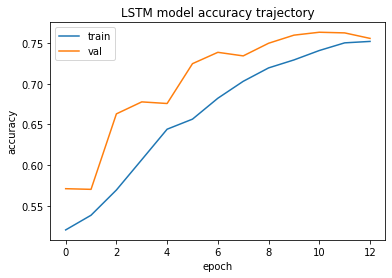

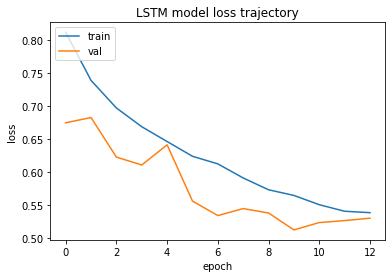

In [96]:
import matplotlib.pyplot as plt

# Plotting accuracy trajectory
plt.plot(lstm_res.history['accuracy'])
plt.plot(lstm_res.history['val_accuracy'])
plt.title('LSTM model accuracy trajectory')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plotting loss trajectory
plt.plot(lstm_res.history['loss'])
plt.plot(lstm_res.history['val_loss'])
plt.title('LSTM model loss trajectory')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [97]:
train_score = lstm.evaluate(train_padded, y_train, verbose=0)
valid_score = lstm.evaluate(val_padded,y_val,verbose=0)
print(' lstm train accuracy: ',train_score[1])
print(' lstm valid accuracy:',valid_score[1])

 lstm train accuracy:  0.8084313869476318
 lstm valid accuracy: 0.7552725672721863


In [98]:
y_probs = lstm.predict(val_padded, batch_size=64, verbose=0)
y_probs.reshape((y_probs.shape[0],))
y_pred = [1 if x >= 0.5 else 0 for x in y_probs ]
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.95      0.82      1433
           1       0.89      0.49      0.63      1080

    accuracy                           0.76      2513
   macro avg       0.80      0.72      0.73      2513
weighted avg       0.79      0.76      0.74      2513



## Model Configuration 3, GloVe + LSTM 

In [99]:
max_len =20  # maximum length of a tweet 
tok = Tokenizer()
tok.fit_on_texts(X_train)
train_sequences = tok.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences,maxlen=max_len,padding='post')
val_sequences = tok.texts_to_sequences(X_val)
val_padded = pad_sequences(val_sequences,maxlen= max_len,padding='post')



In [25]:
# !wget http://nlp.stanford.edu/data/glove.twitter.27B.zip
# !unzip glove.twitter.27B.zip
# !rm glove.twitter.27B.zip


def read_glove_vector(glove_vec):
  with open(glove_vec, 'r', encoding='UTF-8') as f:
    words = set()
    word_to_vec_map = {}
    for line in f:
      w_line = line.split()
      curr_word = w_line[0]
      word_to_vec_map[curr_word] = np.array(w_line[1:], dtype=np.float64)



  return word_to_vec_map



In [26]:
glove_vec = read_glove_vector(LIBRARY_PATH + 'LSTM/glove.twitter.27B.200d.txt')

In [100]:

vocab_size = len(tok.word_index)+1
emb_len = glove_vec['eat'].shape[0]
pretrained_weights = np.zeros((vocab_size, emb_len))
for word, index in tok.word_index.items():
  vector = glove_vec.get(word)
  if vector is not None:
    pretrained_weights[index, :] = vector
  else:
    pretrained_weights[index,:] =  np.random.randn(emb_len)



In [101]:
def create_glove_lstm():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size,output_dim=emb_len,input_length=max_len,weights= [pretrained_weights],trainable=False))
    model.add(SpatialDropout1D(0.5))
    model.add(Bidirectional(LSTM(128,recurrent_dropout=0.4,return_sequences=True)))
    model.add(SpatialDropout1D(0.5))
    model.add(Bidirectional(LSTM(128,recurrent_dropout=0.4,return_sequences=False)))
    model.add(Dense(256,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(128,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model


In [102]:
# results = {}
lr = 1e-3
# lrs = np.linspace(1e-3,1e-4,10)
epochs = 10
# for lr in lrs:

lstm_opt = Adam(learning_rate=lr)
# lstm_opt = SGD(learning_rate=lr)
with tpu_strategy.scope():
  lstm = create_glove_lstm()
  lstm.compile(loss='binary_crossentropy',
                optimizer=lstm_opt,
                metrics=['accuracy'])
  lstm_res = lstm.fit(train_padded,
            y_train,
            batch_size=32,
            epochs=epochs,
            validation_data=(val_padded, y_val), verbose=True)



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 20, 200)           2248000   
                                                                 
 spatial_dropout1d_9 (Spatia  (None, 20, 200)          0         
 lDropout1D)                                                     
                                                                 
 bidirectional_10 (Bidirecti  (None, 20, 256)          336896    
 onal)                                                           
                                                                 
 spatial_dropout1d_10 (Spati  (None, 20, 256)          0         
 alDropout1D)                                                    
                                                                 
 bidirectional_11 (Bidirecti  (None, 256)              394240    
 onal)                                                

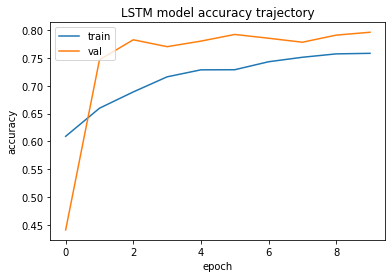

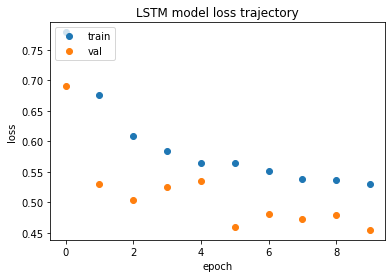

In [103]:
import matplotlib.pyplot as plt

# Plotting accuracy trajectory
plt.plot(lstm_res.history['accuracy'])
plt.plot(lstm_res.history['val_accuracy'])
plt.title('LSTM model accuracy trajectory')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plotting loss trajectory
plt.plot(lstm_res.history['loss'],'o')
plt.plot(lstm_res.history['val_loss'],'o')
plt.title('LSTM model loss trajectory')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [104]:
train_score = lstm.evaluate(train_padded, y_train, verbose=0)
valid_score = lstm.evaluate(val_padded,y_val,verbose=0)
print(' lstm train accuracy: ',train_score[1])
print(' lstm valid accuracy:',valid_score[1])

 lstm train accuracy:  0.8141176104545593
 lstm valid accuracy: 0.795861542224884


In [105]:
y_probs = lstm.predict(val_padded, batch_size=32, verbose=0)
y_probs.reshape((y_probs.shape[0],))
y_pred = [1 if x >= 0.5 else 0 for x in y_probs ]
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1433
           1       0.75      0.79      0.77      1080

    accuracy                           0.80      2513
   macro avg       0.79      0.79      0.79      2513
weighted avg       0.80      0.80      0.80      2513

